# Problem 1: Clustering
A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

1.2 Do you think scaling is necessary for clustering in this case? Justify

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

# # Data Dictionary for Market Segmentation:

spending: Amount spent by the customer per month (in 1000s)

advance_payments: Amount paid by the customer in advance by cash (in 100s)

probability_of_full_payment: Probability of payment done in full by the customer to the bank

current_balance: Balance amount left in the account to make purchases (in 1000s)

credit_limit: Limit of the amount in credit card (10000s)

min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)

max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_df = pd.read_csv("D:/Study/DATA MINING/PROJECT/bank_marketing_part1_Data.csv")

In [3]:
data_df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


In [4]:
data_df.shape

(210, 7)

In [5]:
data_df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [8]:
data_df.duplicated().sum()

0

In [9]:
min(data_df)

'advance_payments'

array([[<AxesSubplot:title={'center':'spending'}>,
        <AxesSubplot:title={'center':'advance_payments'}>,
        <AxesSubplot:title={'center':'probability_of_full_payment'}>],
       [<AxesSubplot:title={'center':'current_balance'}>,
        <AxesSubplot:title={'center':'credit_limit'}>,
        <AxesSubplot:title={'center':'min_payment_amt'}>],
       [<AxesSubplot:title={'center':'max_spent_in_single_shopping'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

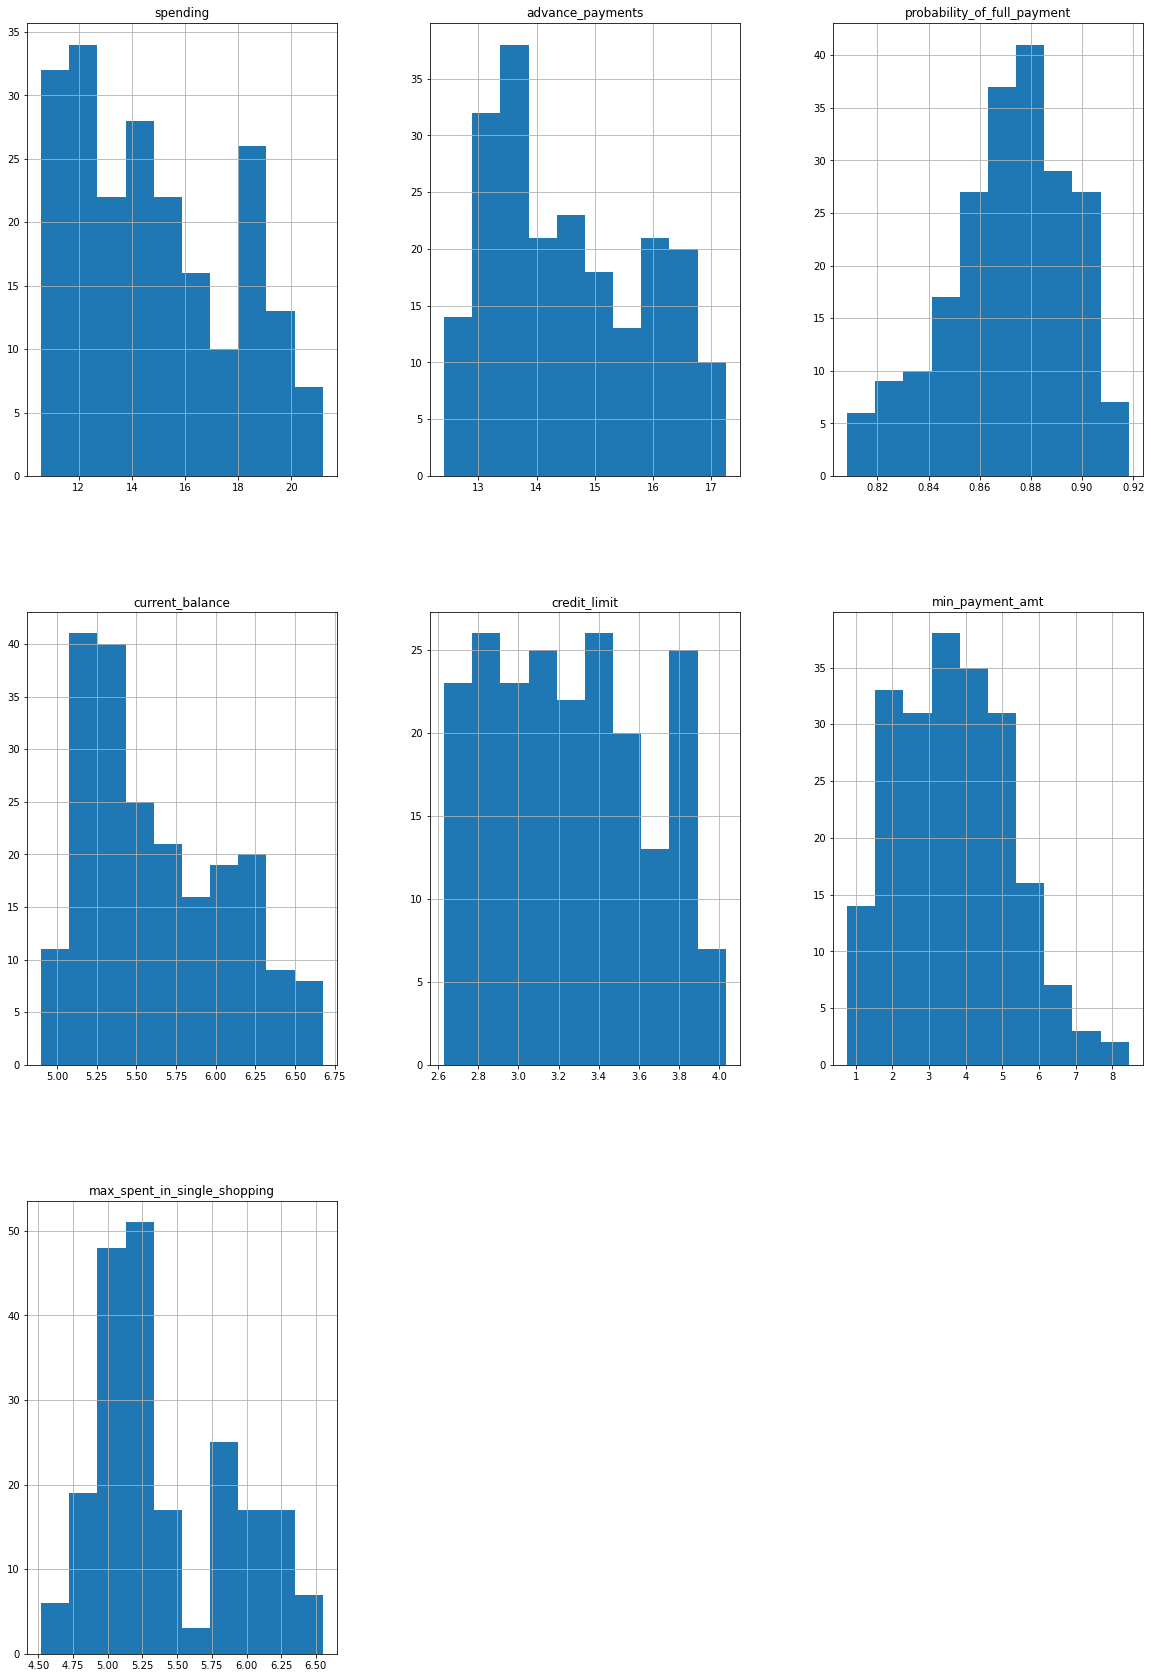

In [10]:
data_df.hist(figsize=(20,30))

<AxesSubplot:>

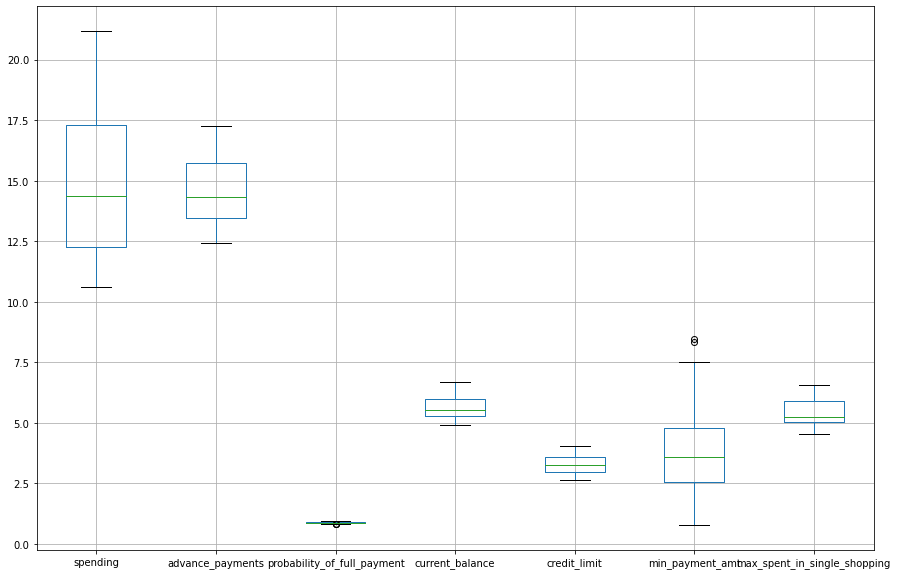

In [11]:
data_df.boxplot(figsize=(15,10))

<AxesSubplot:>

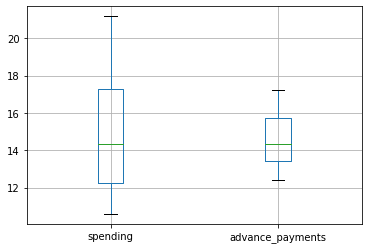

In [12]:
data_df.boxplot(column = ['spending','advance_payments'])

<AxesSubplot:>

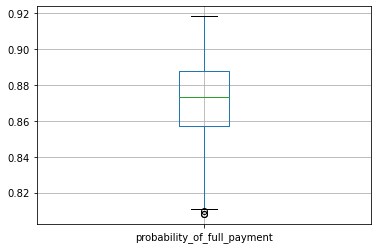

In [13]:
data_df.boxplot(column = ['probability_of_full_payment'])

<AxesSubplot:>

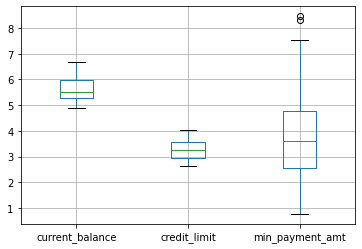

In [14]:
data_df.boxplot(column = ['current_balance','credit_limit','min_payment_amt'])

<AxesSubplot:>

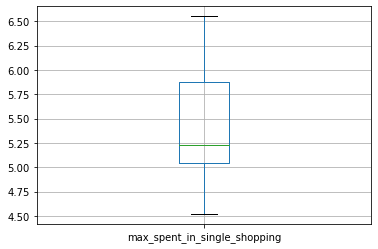

In [15]:
data_df.boxplot(column = ['max_spent_in_single_shopping'])

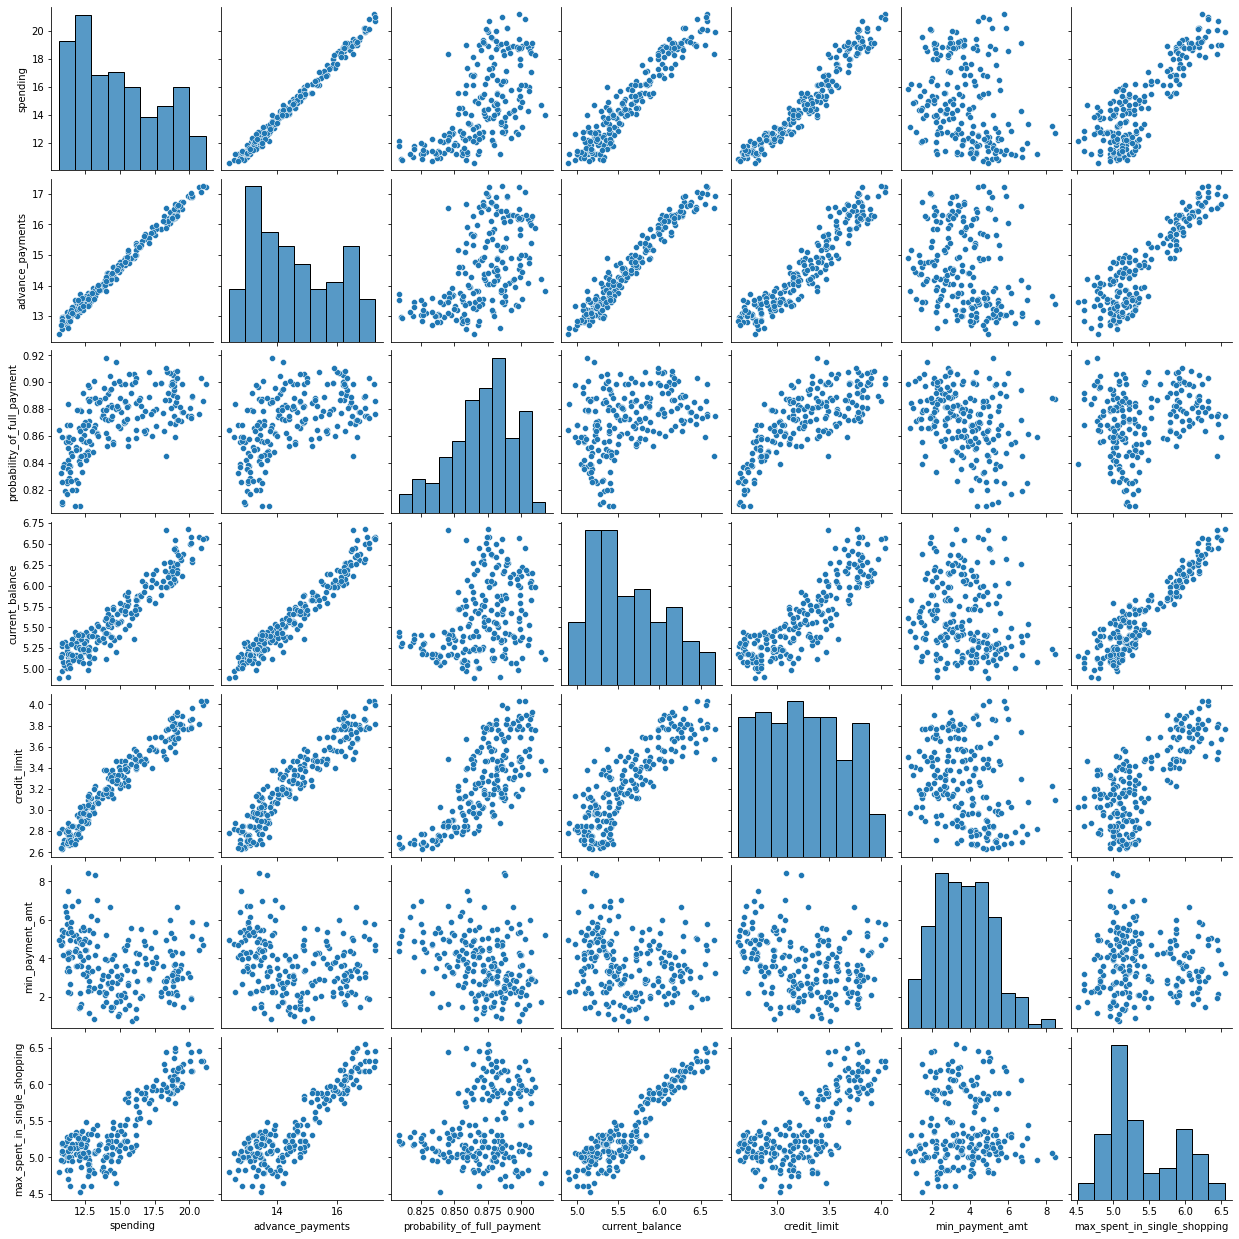

In [16]:
sns.pairplot(data_df)

<AxesSubplot:>

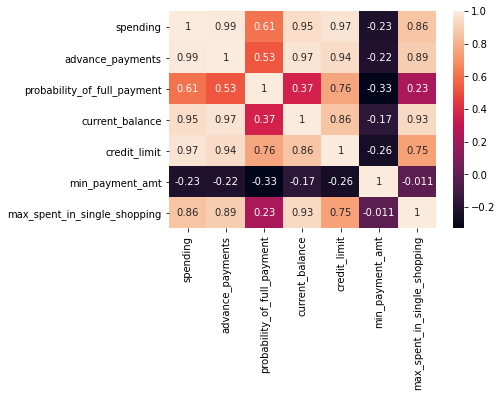

In [17]:
corr = data_df.corr()

sns.heatmap(corr, annot=True)

In [18]:
cust_df = data_df

In [19]:
cust_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [20]:
# SCALING THE DATA

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
X = StandardScaler()

In [23]:
scaled_df = X.fit_transform(cust_df)

In [24]:
scaled_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

# Creating the Dendrogram
### Importing dendrogram and linkage module

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [26]:
Hclust = linkage(scaled_df, method ='ward')

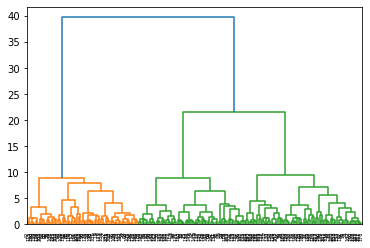

In [27]:
dend = dendrogram(Hclust)

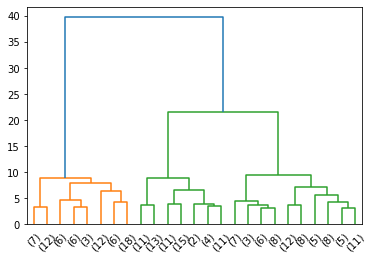

In [28]:
dend = dendrogram(Hclust,
                 truncate_mode='lastp',
                 p = 25,# we are looking at the last 25 merges
                 )

In [29]:
# Identify the number of clusters based on the dendrogram and add the cluster numbers to the original dataframe

In [30]:
from scipy.cluster.hierarchy import fcluster


In [31]:
clusters_1 = fcluster(Hclust, 2, criterion='maxclust')
clusters_1

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [32]:
clusters_2 = fcluster(Hclust, 25, criterion='distance')
clusters_2

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [33]:
clusters_2

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [34]:
k_means = KMeans(n_clusters = 2)

In [35]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [36]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [37]:
k_means.inertia_

659.171754487041

In [38]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

430.6589731513006

In [39]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

371.1846125351018

In [40]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

1469.9999999999998

In [41]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df)
k_means.inertia_

326.22891682972653

In [42]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
k_means.inertia_

289.3440263223005

In [43]:
wss =[] 

In [44]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [45]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.1846125351018,
 326.5136953844313,
 289.8117122400139,
 262.16371336188024,
 239.62808510677345,
 221.26011213186618,
 206.09431103959514]

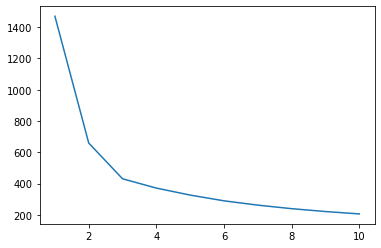

In [46]:
plt.plot(range(1,11), wss)

In [47]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [48]:
data_df["Clus_kmeans"] = labels
data_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0


In [49]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [50]:
silhouette_score(scaled_df,labels)

0.4007270552751299

In [51]:
sil_width = silhouette_samples(scaled_df,labels)

In [52]:
data_df["sil_width"] = sil_width
data_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0,0.362276


In [53]:
silhouette_samples(scaled_df,labels).min()

0.002713089347678533

In [54]:
data_df.to_csv('Data mining project.csv')

In [55]:
data_df.Clus_kmeans.value_counts().sort_index()

0    67
1    72
2    71
Name: Clus_kmeans, dtype: int64

In [56]:
data_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0,0.362276


In [57]:
data_df.head(20)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0,0.362276
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,1,0.218446
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,1,0.472867
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,2,0.361812
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,0,0.520285
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,1,0.532517


In [58]:
data_df.groupby("Clus_kmeans", sort=False)["spending","advance_payments","probability_of_full_payment","current_balance","credit_limit","min_payment_amt","max_spent_in_single_shopping"].mean()

<ipython-input-58-f082a3ae446e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_df.groupby("Clus_kmeans", sort=False)["spending","advance_payments","probability_of_full_payment","current_balance","credit_limit","min_payment_amt","max_spent_in_single_shopping"].mean()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
Clus_kmeans,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722


# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

In [59]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

In [60]:
df_insurance=pd.read_csv("insurance_part2_data.csv")

In [61]:
df_insurance1 = df_insurance.copy()

In [62]:
df_insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [63]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [64]:
df_insurance.duplicated().sum()

139

In [65]:
df_insurance.drop_duplicates(inplace=True)
df_insurance.duplicated().sum()

0

In [66]:
df_insurance.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [67]:
df_insurance.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,2861,NaN,NaN,NaN,38.2041,10.6781,8,31,36,43,84
Agency_Code,2861,4,EPX,1238,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,2861,2,Travel Agency,1709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,2861,2,No,1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,2861,NaN,NaN,NaN,15.081,25.8268,0,0,5.63,17.82,210.21
Channel,2861,2,Online,2815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,2861,NaN,NaN,NaN,72.1202,135.977,-1,12,28,66,4580
Sales,2861,NaN,NaN,NaN,61.7579,71.3997,0,20,33.5,69.3,539
Product Name,2861,5,Customised Plan,1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,2861,3,ASIA,2327,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df_insurance.Claimed.value_counts()

No     1947
Yes     914
Name: Claimed, dtype: int64

In [69]:
df_insurance.Destination.value_counts()

ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64

In [70]:
df_insurance.Type.value_counts()

Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64

In [71]:
df_insurance.Agency_Code.value_counts()

EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Commision'}>],
       [<AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Sales'}>]], dtype=object)

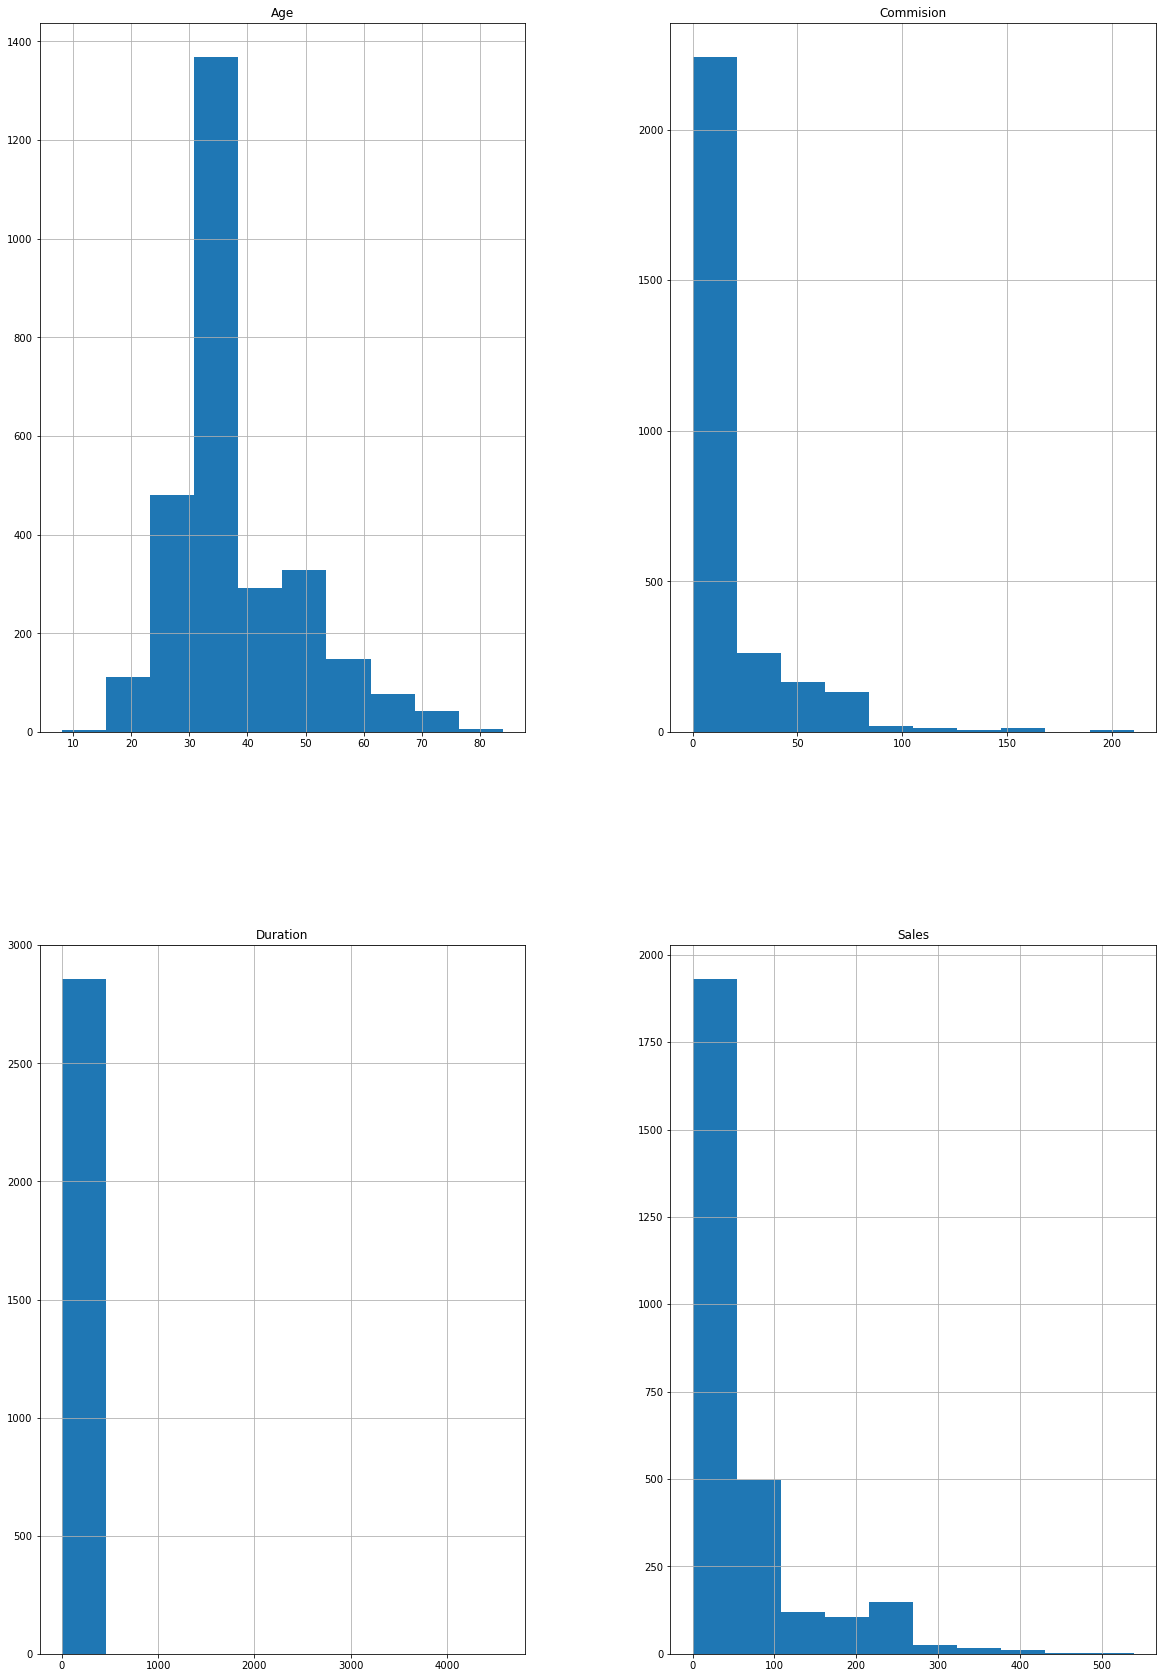

In [72]:
df_insurance.hist(figsize=(20,30))

<AxesSubplot:xlabel='Age'>

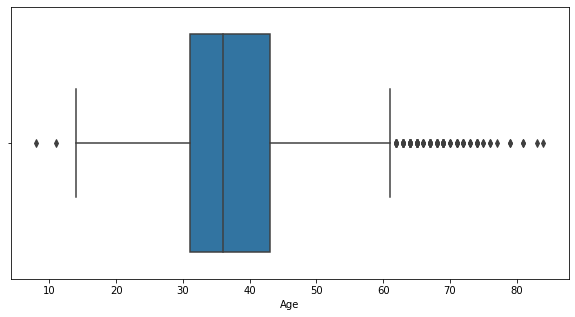

In [73]:
#data_df.hist(figsize=(20,30))
plt.figure(figsize=(10,5))
sns.boxplot(data=df_insurance, x='Age')


<AxesSubplot:xlabel='Commision'>

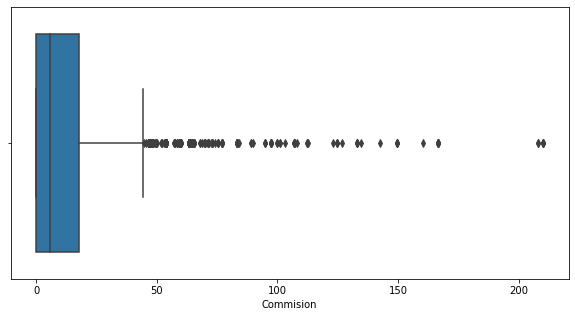

In [74]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_insurance, x='Commision')

<AxesSubplot:xlabel='Duration'>

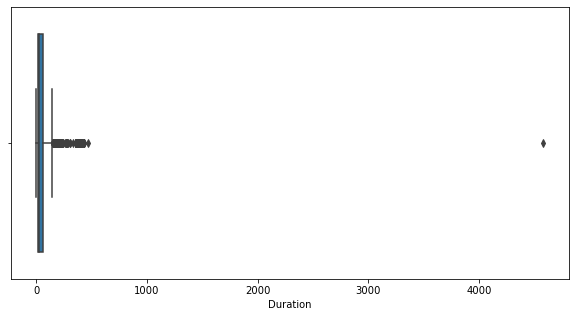

In [75]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_insurance, x='Duration')

<AxesSubplot:xlabel='Sales'>

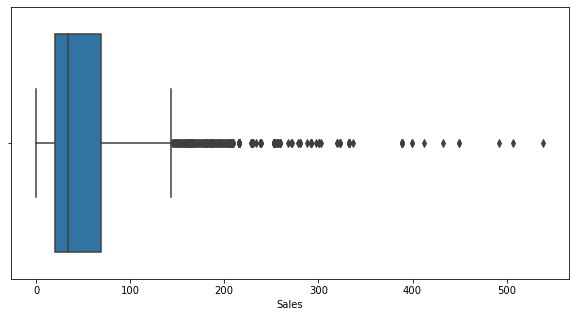

In [76]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_insurance, x='Sales')

<AxesSubplot:xlabel='Agency_Code', ylabel='Duration'>

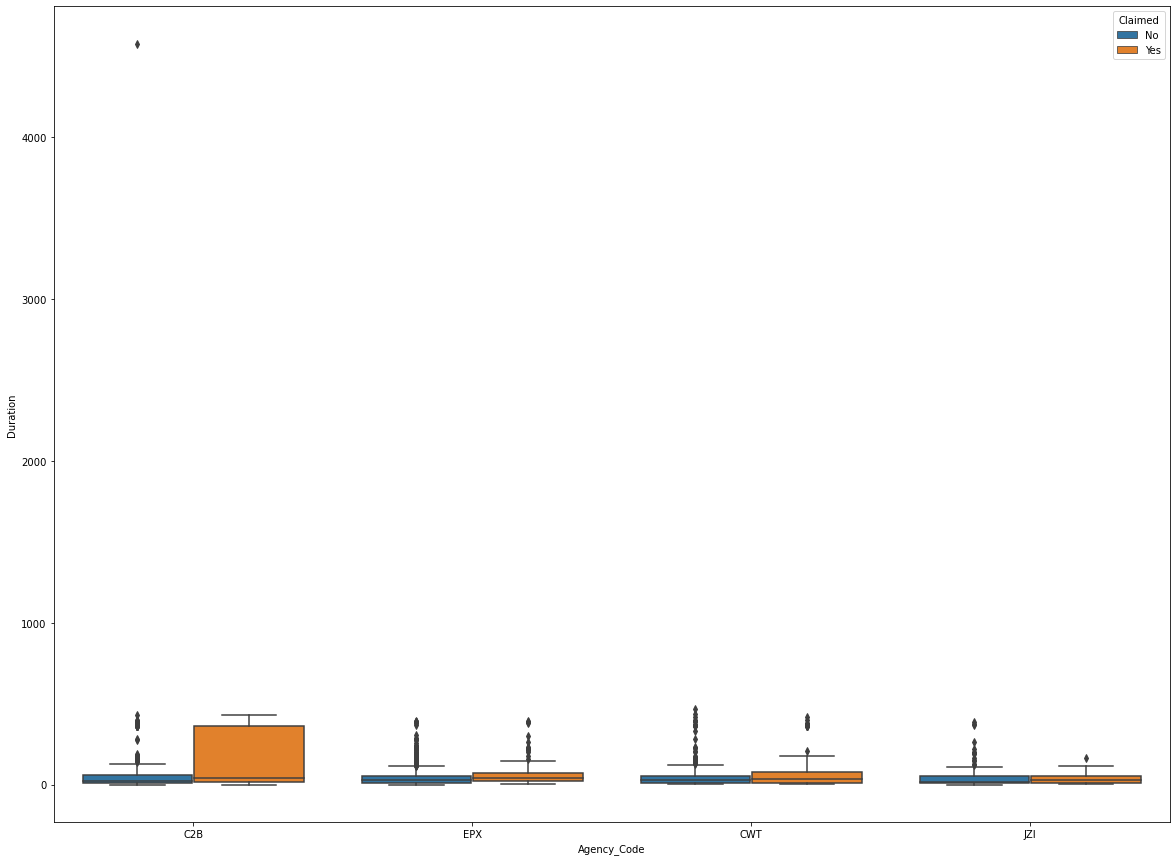

In [77]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df_insurance, x='Agency_Code', y='Duration',hue='Claimed')

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

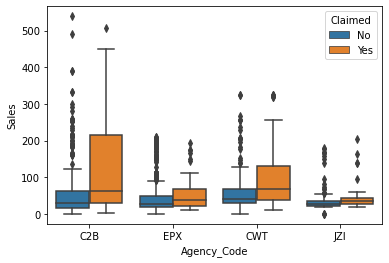

In [78]:
sns.boxplot(data=df_insurance, x='Agency_Code', y='Sales',hue='Claimed')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

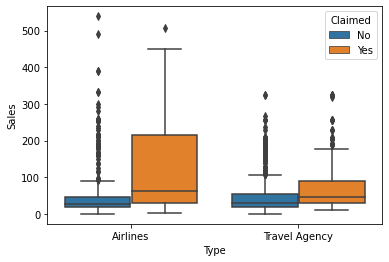

In [79]:
sns.boxplot(data=df_insurance, x='Type', y='Sales',hue='Claimed')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

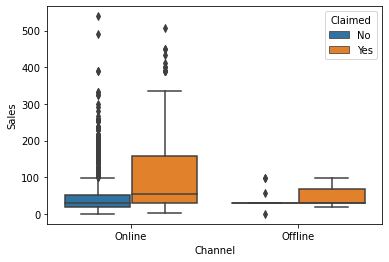

In [80]:
sns.boxplot(data=df_insurance, x='Channel', y='Sales',hue='Claimed')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

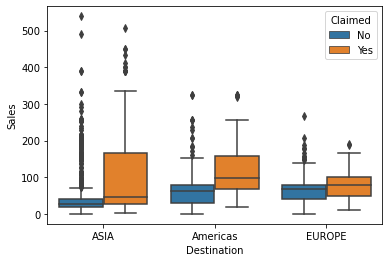

In [81]:
sns.boxplot(data=df_insurance, x='Destination', y='Sales',hue='Claimed')

# Treating the Outliers

Treating outliers sometimes results in the models having better performance but the models lose out on the generalization. So, a good way to approach this would be to build models with and without treating outliers and then report the results

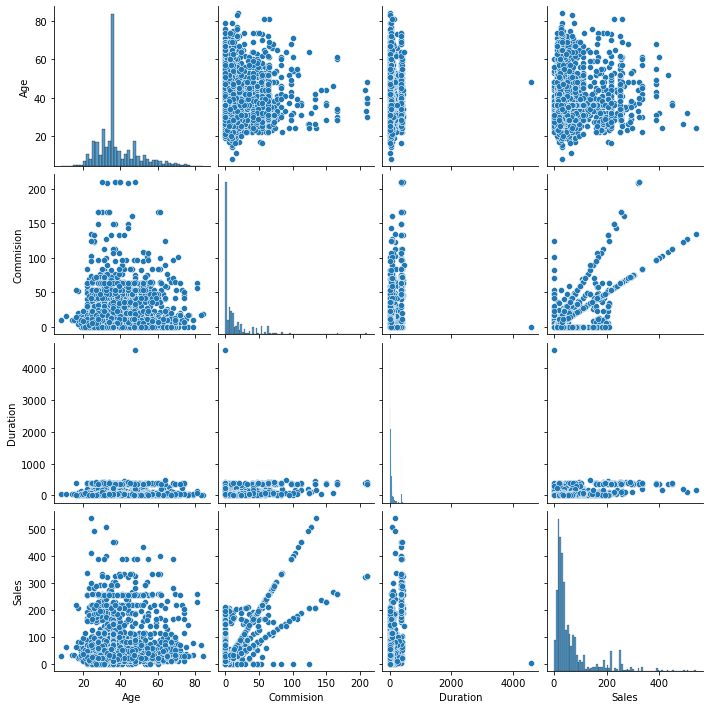

In [82]:
sns.pairplot(df_insurance)

<AxesSubplot:>

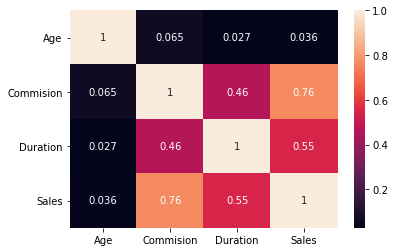

In [83]:
corr = df_insurance.corr()

sns.heatmap(corr, annot=True)

# Changing all Objects to Categorical

Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
The following code loops through each column and checks if the column type is object then converts those columns into  categorical with each distinct value becoming a category or code.

In [84]:
for feature in df_insurance.columns: 
    if df_insurance[feature].dtype == 'object':
              df_insurance[feature] = pd.Categorical(df_insurance[feature]).codes 

In [85]:
df_insurance.head(5)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [86]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 208.5 KB


### Capture the target column into separate vectors for training set and test set

In [87]:
X = df_insurance.drop("Claimed", axis=1)
y = df_insurance.pop("Claimed")


In [88]:
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [89]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claimed, dtype: int8

# Splitting data into training and test set

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [91]:
train_labels.value_counts()

0    1359
1     643
Name: Claimed, dtype: int64

In [92]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


# DECISION TREE CLASSIFIER MODEL



In [93]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [94]:
df_dtree = DecisionTreeClassifier(criterion = 'gini')

In [95]:
#df_dtree.fit(X_train, train_labels)
df_dtree.fit(X_train, train_labels)

DecisionTreeClassifier()

In [96]:
print (pd.DataFrame(df_dtree.feature_importances_, columns = ["Imp"], index = X_train.columns))


                   Imp
Age           0.200532
Agency_Code   0.168891
Type          0.001378
Commision     0.078298
Channel       0.003908
Duration      0.265205
Sales         0.223322
Product Name  0.031818
Destination   0.026648


In [97]:
from sklearn import tree

train_char_label = ['No', 'Yes']
insurance_Tree_File = open('d:\insurance.dot','w')
dot_data = tree.export_graphviz(df_dtree, out_file=insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

insurance_Tree_File.close()


In [98]:
print (pd.DataFrame(df_dtree.feature_importances_, columns = ["Imp"], index = X_train.columns))


                   Imp
Age           0.200532
Agency_Code   0.168891
Type          0.001378
Commision     0.078298
Channel       0.003908
Duration      0.265205
Sales         0.223322
Product Name  0.031818
Destination   0.026648


In [99]:
y_predict = df_dtree.predict(X_test)

In [100]:

reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [101]:
insurance_tree_regularized = open('d:\insurance_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= insurance_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

insurance_tree_regularized.close()

print (pd.DataFrame(df_dtree.feature_importances_, columns = ["Imp"], index = X_train.columns))


                   Imp
Age           0.200532
Agency_Code   0.168891
Type          0.001378
Commision     0.078298
Channel       0.003908
Duration      0.265205
Sales         0.223322
Product Name  0.031818
Destination   0.026648


In [102]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

AUC: 0.857


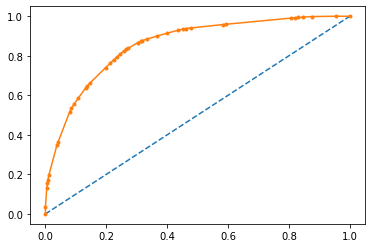

In [103]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.788


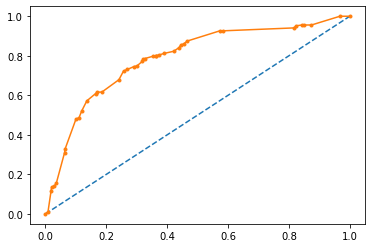

In [104]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [105]:
from sklearn.metrics import classification_report,confusion_matrix

In [106]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1359
           1       0.72      0.58      0.65       643

    accuracy                           0.79      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.79      0.79      2002



In [107]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       588
           1       0.66      0.57      0.61       271

    accuracy                           0.77       859
   macro avg       0.74      0.72      0.73       859
weighted avg       0.77      0.77      0.77       859



In [108]:
confusion_matrix(train_labels, ytrain_predict)

array([[1213,  146],
       [ 267,  376]], dtype=int64)

In [109]:
confusion_matrix(test_labels, ytest_predict)

array([[508,  80],
       [116, 155]], dtype=int64)

In [110]:
reg_dt_model.score(X_train,train_labels)

0.7937062937062938

In [111]:
reg_dt_model.score(X_test,test_labels)

0.7718277066356228

# RANDOM FOREST CLASSIFIER MODEL

In [112]:
df_insurance1.head()


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rfcl = RandomForestClassifier(n_estimators = 100,max_features=6,random_state=0)
rfcl = rfcl.fit(X_train, train_labels)

In [115]:
rfcl

RandomForestClassifier(max_features=6, random_state=0)

##### Predicting Train and Test data with the RF Model

In [116]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [117]:
#Train Accuracy
rfcl.score(X_train,train_labels)

0.9955044955044955

In [118]:
##### Evaluating model performance with confusion matrix

from sklearn.metrics import confusion_matrix,classification_report

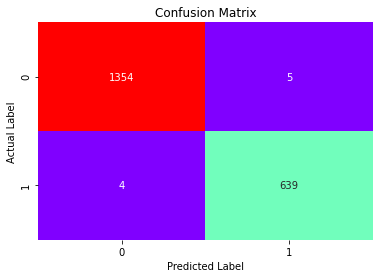

In [119]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [120]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1359
           1       0.99      0.99      0.99       643

    accuracy                           1.00      2002
   macro avg       0.99      1.00      0.99      2002
weighted avg       1.00      1.00      1.00      2002



In [121]:
print('Accuracy', ((1359+643)/(1359+643)))
print('Sensitivity',((643/643))) #TP/Actual yes
print('Specificity',(1359/1359)) #TN/Actual no
print('Precision',(643/643)) #TP/Predicted yes

Accuracy 1.0
Sensitivity 1.0
Specificity 1.0
Precision 1.0


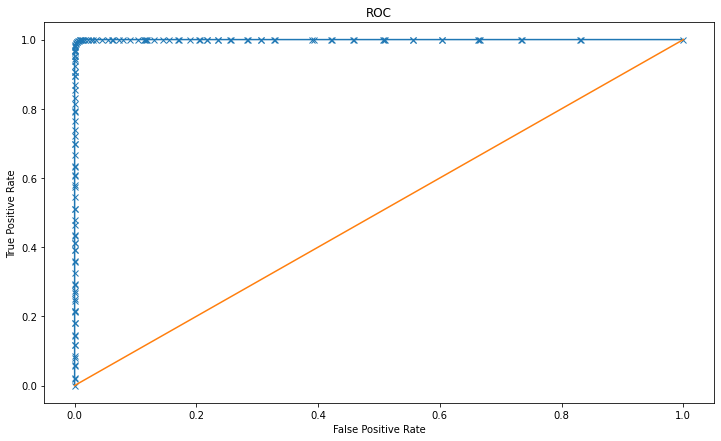

Area under Curve is 0.9999307651198107


In [122]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,rfcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,rfcl.predict_proba(X_train)[:,1]))

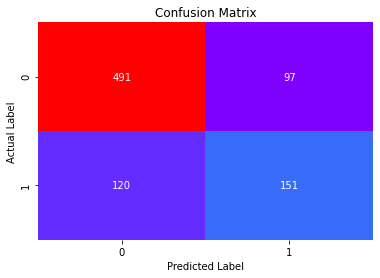

In [123]:
# Evaluating model performance on the test data

confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [124]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       588
           1       0.61      0.56      0.58       271

    accuracy                           0.75       859
   macro avg       0.71      0.70      0.70       859
weighted avg       0.74      0.75      0.74       859



In [125]:
print('Accuracy', ((491+151)/(491+97+120+151)))
print('Sensitivity',((151/(151+120)))) 
print('Specificity',(491/(491+97)))
print('Precision',(151/(151+97)))

Accuracy 0.7473806752037253
Sensitivity 0.5571955719557196
Specificity 0.8350340136054422
Precision 0.6088709677419355


In [126]:
rfcl.score(X_test,test_labels)

0.7473806752037253

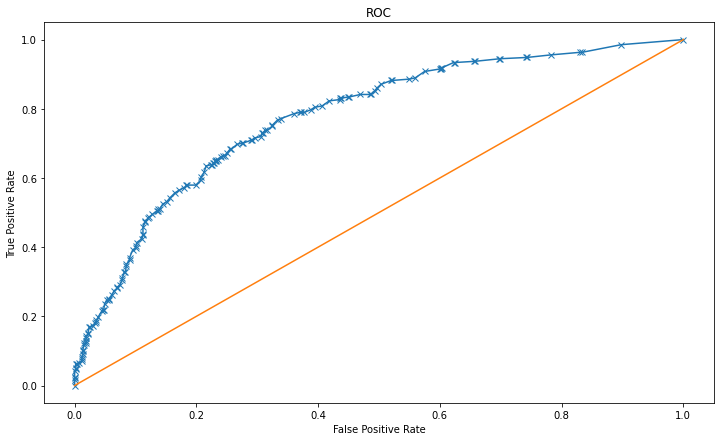

Area under Curve is 0.776131485804654


In [127]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,rfcl.predict_proba(X_test)[:,1]))

# Building an ANN Model

In [128]:
df_insurance_ann = df_insurance1.copy()
df_insurance_ann.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [129]:
for feature in df_insurance_ann.columns: 
    if df_insurance_ann[feature].dtype == 'object':
              df_insurance_ann[feature] = pd.Categorical(df_insurance_ann[feature]).codes 

In [130]:
df_insurance_ann.head(5)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [131]:
X = df_insurance_ann.drop("Claimed", axis=1)
y = df_insurance_ann.pop("Claimed")


In [132]:
from sklearn.neural_network import MLPClassifier

In [133]:

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
sc = StandardScaler()

In [136]:
X_train = sc.fit_transform(X_train)

In [137]:
X_train

array([[-0.19192502,  0.72815922,  0.80520286, ..., -0.5730663 ,
         0.24642411, -0.43926017],
       [-0.19192502,  0.72815922,  0.80520286, ..., -0.26910565,
         0.24642411,  1.27851702],
       [-0.97188154, -1.28518425, -1.24192306, ...,  1.74601534,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.72815922,  0.80520286, ...,  0.02103862,
         0.24642411, -0.43926017],
       [ 0.58803151,  1.73483096, -1.24192306, ..., -0.60069909,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.53852532,
         1.83381865, -0.43926017]])

In [138]:
X_test = sc.transform(X_test)

In [139]:
X_test

array([[-1.55684893, -0.27851251,  0.80520286, ...,  0.18683534,
        -1.34097044,  2.99629421],
       [ 1.66047173, -1.28518425, -1.24192306, ..., -0.48325974,
        -1.34097044, -0.43926017],
       [-0.87438698, -1.28518425, -1.24192306, ..., -0.62833187,
        -1.34097044, -0.43926017],
       ...,
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.47635155,
        -1.34097044, -0.43926017],
       [ 1.07550434,  1.73483096, -1.24192306, ..., -0.43490237,
        -1.34097044, -0.43926017],
       [-0.28941958,  1.73483096, -1.24192306, ..., -0.49016794,
        -1.34097044, -0.43926017]])

In [140]:
clf = MLPClassifier(hidden_layer_sizes=(500),solver='sgd',random_state=0,max_iter=500)


In [141]:
clf.fit(X_train, train_labels)
y_pred = clf.predict(X_test)

In [142]:
from sklearn.metrics import confusion_matrix,classification_report

In [143]:
cm = confusion_matrix(test_labels, y_pred)
cm

array([[564,  41],
       [178, 117]], dtype=int64)

In [144]:
pred2 = clf.predict(X_train)
confusion_matrix(train_labels,pred2)

array([[1328,  143],
       [ 328,  301]], dtype=int64)

In [145]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       605
           1       0.74      0.40      0.52       295

    accuracy                           0.76       900
   macro avg       0.75      0.66      0.68       900
weighted avg       0.75      0.76      0.73       900



In [146]:
print(classification_report(train_labels, pred2))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1471
           1       0.68      0.48      0.56       629

    accuracy                           0.78      2100
   macro avg       0.74      0.69      0.71      2100
weighted avg       0.76      0.78      0.76      2100



In [147]:
import matplotlib.pyplot as plt

AUC: 0.808


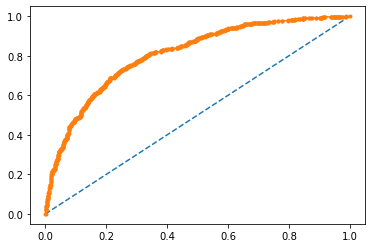

In [148]:
# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.796


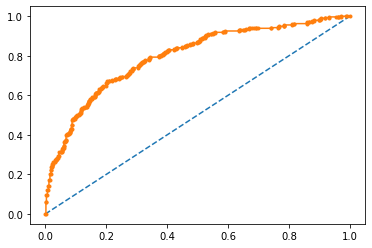

In [149]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Comparing Models on The test set

In [150]:
models=[df_dtree,rfcl,clf]
models_names={df_dtree:'DecisionTreeClassifier',rfcl:'RandomForestClassifier',clf:'ANN'}

Accuracy for DecisionTreeClassifier model is 
 0.72


Classification report for DecisionTreeClassifier model is 
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       605
           1       0.58      0.52      0.55       295

    accuracy                           0.72       900
   macro avg       0.68      0.67      0.67       900
weighted avg       0.71      0.72      0.72       900



Confusion Matrix for DecisionTreeClassifier model is


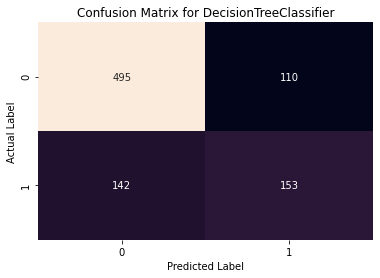

Accuracy for RandomForestClassifier model is 
 0.7577777777777778


Classification report for RandomForestClassifier model is 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       605
           1       0.69      0.48      0.57       295

    accuracy                           0.76       900
   macro avg       0.73      0.69      0.70       900
weighted avg       0.75      0.76      0.74       900



Confusion Matrix for RandomForestClassifier model is


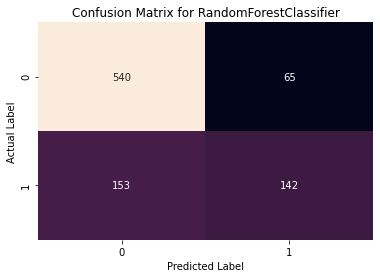

Accuracy for ANN model is 
 0.7566666666666667


Classification report for ANN model is 
               precision    recall  f1-score   support

           0       0.76      0.93      0.84       605
           1       0.74      0.40      0.52       295

    accuracy                           0.76       900
   macro avg       0.75      0.66      0.68       900
weighted avg       0.75      0.76      0.73       900



Confusion Matrix for ANN model is


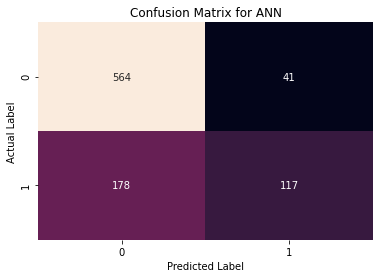

In [151]:
for i in models:
    i.fit(X_train,train_labels)
    print('Accuracy for {} model is'.format(models_names[i]),'\n',accuracy_score(test_labels,i.predict(X_test)))
    print('\n')
    print('Classification report for {} model is'.format(models_names[i]),'\n',classification_report(test_labels,i.predict(X_test)))
    print('\n')
    print('Confusion Matrix for {} model is'.format(models_names[i]))
    sns.heatmap(confusion_matrix(test_labels,i.predict(X_test)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(models_names[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

# Compare ROC curves and Calculate Area under the curve for all models



Area under the curve for Decision Tree Classification Model is 0.670981930242331
Area under the curve for Random Forest Classification Model is 0.798080963720409
Area under the curve for Artificial Neural Network Model is 0.7963608348508193


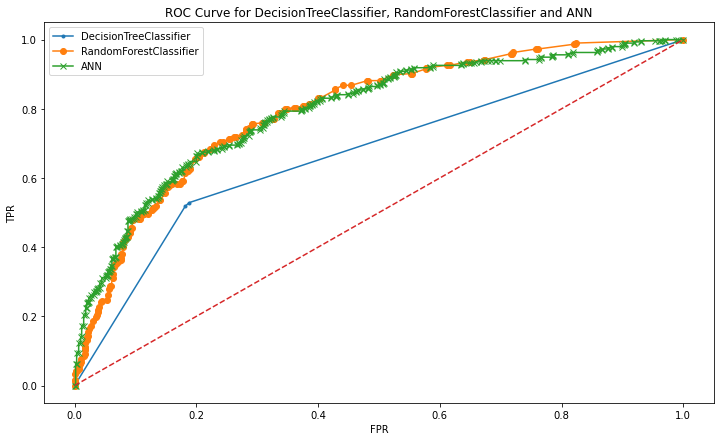

In [152]:
print('Area under the curve for Decision Tree Classification Model is',roc_auc_score(test_labels,df_dtree.predict_proba(X_test)[:,1]))
print('Area under the curve for Random Forest Classification Model is',roc_auc_score(test_labels,rfcl.predict_proba(X_test)[:,1]))
print('Area under the curve for Artificial Neural Network Model is',roc_auc_score(test_labels,clf.predict_proba(X_test)[:,1]))

plt.figure(figsize=(12,7))
fpr_dtc, tpr_dtc, thresholds = roc_curve(test_labels, df_dtree.predict_proba(X_test)[:,1])
plt.plot(fpr_dtc, tpr_dtc, marker='.') 

fpr_rfc, tpr_rfc, thresholds = roc_curve(test_labels, rfcl.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc, tpr_rfc, marker='o') 

fpr_ann, tpr_ann, thresholds = roc_curve(test_labels, clf.predict_proba(X_test)[:,1])
plt.plot(fpr_ann, tpr_ann, marker='x',) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.title('ROC Curve for {}'.format('DecisionTreeClassifier, RandomForestClassifier and ANN'))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(models_names.values())
plt.show()

# Conclusion
RF performs better than ANN and Decision Tree on the test set

Decision Tree has the least accuracy score for training set

ANN have ~79% area under the curve for testing set

The Accuracy for ANN and RF is similar ~76% for test set